### Esse notebook tem como objetivo compilar os dados dos ativos escolhidos para compor a carteira dita Arrojada. 


#### Ativos:

- BBAS3 - Banco do Brasil <br>
- SAPR4 - Companhia de Saneamento Parana SANEPA<br>
- BERK34 - Berkshire Hathaway BDR <br>
- GOGL34 - Alphabet BDR<br>
- XPML11 - XP Malls Fundo de Investimento Imobiliario <br>
- XPLG11 - XP Log Fundo de Investimento Imobiliario-FII <br>
- Bitcoin <br>


### 1. Busca e organização dos dados:

In [77]:
#Importando as bibliotecas

import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt

In [78]:
#Ativos da carteira, além de dados de entrada para conversão do preço do bitcoin para reais

ativos = ['BBAS3', 'SAPR4', 'BERK34', 'GOGL34', 'XPML11', 'XPLG11', 'BTC-USD', 'USDBRL=X']

In [79]:
#início e fim da análise
#Foram realizadas entregas mensais de relatórios com esses dados.

inicio = '2023-02-17'
fim = '2023-05-17'

In [80]:
#Busca pelos dados na biblioteca yahoo finance e criação de Dataframe com essses dados.

df = pd.DataFrame()

for i in ativos:
    if i in ['BTC-USD', 'USDBRL=X']:
        ticker = i
    else:
        ticker = i + '.SA'
    
    data = yf.download(ticker, start=inicio, end=fim)
    
    if 'Adj Close' in data.columns:
        df[i] = data['Adj Close']
    else:
        print(f"Dados de {i} não estão disponíveis.")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [81]:
df.head()

,BBAS3,SAPR4,BERK34,GOGL34,XPML11,XPLG11,BTC-USD,USDBRL=X
Date,,,,,,,,
2023-02-17,39.847919,3.354393,79.669998,40.680000,91.162727,88.142906,24565.601562,5.2168
2023-02-22,38.861488,3.325642,77.900002,39.310001,91.349083,88.539253,24188.843750,5.1665
2023-02-23,39.177891,3.306474,77.339996,38.740002,91.330452,86.359283,23947.492188,5.1512
2023-02-24,38.425034,3.296890,78.660004,38.439999,91.321144,87.199188,23198.126953,5.1362
2023-02-27,37.902958,3.287306,78.940002,38.779999,91.982727,87.199188,23522.871094,5.2078


In [82]:
#Conversão para reais.

df['BITCOIN R$'] = df['BTC-USD']*df['USDBRL=X']

In [83]:
df.head()

,BBAS3,SAPR4,BERK34,GOGL34,XPML11,XPLG11,BTC-USD,USDBRL=X,BITCOIN R$
Date,,,,,,,,,
2023-02-17,39.847919,3.354393,79.669998,40.680000,91.162727,88.142906,24565.601562,5.2168,128153.835460
2023-02-22,38.861488,3.325642,77.900002,39.310001,91.349083,88.539253,24188.843750,5.1665,124971.663449
2023-02-23,39.177891,3.306474,77.339996,38.740002,91.330452,86.359283,23947.492188,5.1512,123358.317390
2023-02-24,38.425034,3.296890,78.660004,38.439999,91.321144,87.199188,23198.126953,5.1362,119150.218524
2023-02-27,37.902958,3.287306,78.940002,38.779999,91.982727,87.199188,23522.871094,5.2078,122502.406000


### 2. Patrimônio investido: 

In [99]:
#Quantidade de cada ativo comprado.

#O Bitcoin for fornecido a partir da fração adquirida.

quantidades = [237, 2000, 61, 168 , 83, 88, 0.04065, 0.04065, 0.04065]

In [117]:
PL = df*quantidades

#Valor total investido = R$ 50000,00

PL['Minha Carteira'] = PL.iloc[:].sum(axis = 1)

In [118]:
#Valor total adquirido

PL.head()

,BBAS3,SAPR4,BERK34,GOGL34,XPML11,XPLG11,BTC-USD,USDBRL=X,BITCOIN R$,Minha Carteira
Date,,,,,,,,,,
2023-02-17,9443.956913,6708.786964,4859.869888,6834.240051,7566.506371,7756.575745,998.591704,0.212063,5209.453411,49378.193110
2023-02-22,9210.172737,6651.283264,4751.900093,6604.080231,7581.973885,7791.454285,983.276498,0.210018,5080.098119,48654.449130
2023-02-23,9285.160114,6612.947464,4717.739777,6508.320282,7580.427513,7599.616943,973.465557,0.209396,5014.515602,48292.402649
2023-02-24,9106.732956,6593.779564,4798.260223,6457.919769,7579.654961,7673.528564,943.003861,0.208787,4843.456383,47996.545068
2023-02-27,8983.001026,6574.611664,4815.340149,6515.039795,7634.566345,7673.528564,956.204710,0.211697,4979.722804,48132.226754


In [119]:
#Valor inicial investido em reais (R$)

#O Bitcoin for forcido em uma fração do valor total.

linha_1 = PL.iloc[0]

print(linha_1)

BBAS3              9443.956913
SAPR4              6708.786964
BERK34             4859.869888
GOGL34             6834.240051
XPML11             7566.506371
XPLG11             7756.575745
BTC-USD             998.591704
USDBRL=X              0.212063
BITCOIN R$         5209.453411
Minha Carteira    49378.193110
Name: 2023-02-17 00:00:00, dtype: float64


### 3. Performance dos ativos:

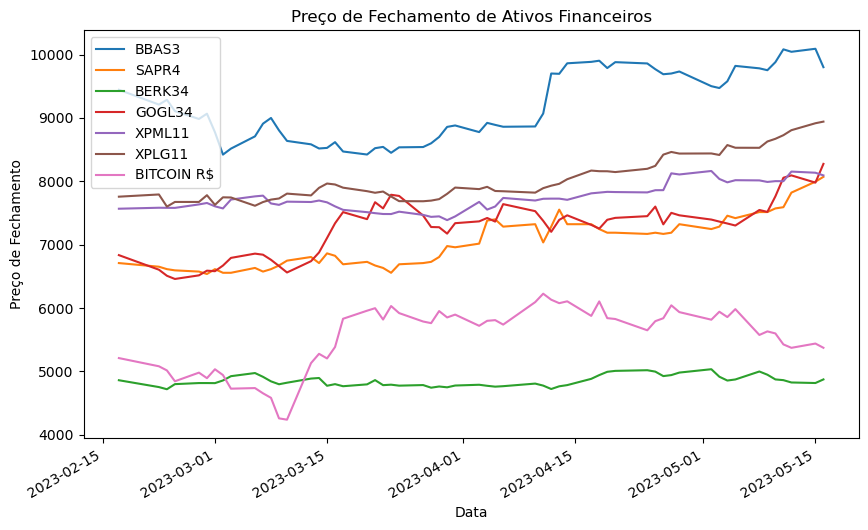

In [120]:
#Como podemos ver a discrepância  de preços é muito grande, o que afeta a vizualização, para corrigir isso faremos uma normalização dos 
#dados, isto é, dividir pelo valor inicial.

colunas = ['BBAS3', 'SAPR4', 'BERK34', 'GOGL34', 'XPML11', 'XPLG11', 'BITCOIN R$']

PL[colunas].plot(figsize = (10,6))

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')


plt.title('Preço de Fechamento de Ativos Financeiros')


plt.show()

In [121]:
df_normalizado = PL/PL.iloc[0]

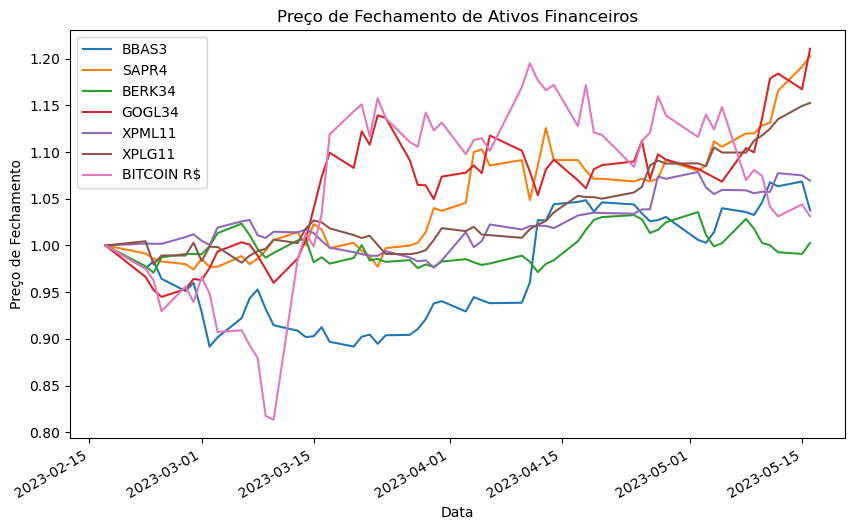

In [122]:
#Assim podemos ver quais ativos performaram melhor no período analisado.

colunas = ['BBAS3', 'SAPR4', 'BERK34', 'GOGL34', 'XPML11', 'XPLG11', 'BITCOIN R$']

df_normalizado[colunas].plot(figsize = (10,6))

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')


plt.title('Preço de Fechamento de Ativos Financeiros')


plt.show()

In [123]:
# Performance da carteira no período analisado

primeira_linha = PL.iloc[0]
ultima_linha = PL.iloc[-1]

# Calcula o crescimento percentual entre o valor final e o valor inicial
crescimento_percentual = (ultima_linha / primeira_linha - 1) * 100

# Exibe o crescimento percentual
print(crescimento_percentual)

BBAS3              3.770927
SAPR4             20.285719
BERK34             0.263586
GOGL34            21.066862
XPML11             6.945839
XPLG11            15.269937
BTC-USD           10.058980
USDBRL=X          -6.304637
BITCOIN R$         3.120160
Minha Carteira    10.414678
dtype: float64


### 4. Performance da carteira:

In [125]:
#Mesmo que alguns ativos não façam parte do Ibovespa fareia comparação, pois temos nesse conjunto os principais ativos de
# renda variável nacional.

ibov = yf.download('^BVSP', start = inicio, end = fim)

ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1)

[*********************100%%**********************]  1 of 1 completed


In [132]:
ibov.head()

,IBOV
Date,
2023-02-17,109303.0
2023-02-22,107152.0
2023-02-23,107720.0
2023-02-24,105873.0
2023-02-27,105711.0


In [127]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [128]:
novo_df.head()

,IBOV,BBAS3,SAPR4,BERK34,GOGL34,XPML11,XPLG11,BTC-USD,USDBRL=X,BITCOIN R$,Minha Carteira
Date,,,,,,,,,,,
2023-02-17,109303.0,9443.956913,6708.786964,4859.869888,6834.240051,7566.506371,7756.575745,998.591704,0.212063,5209.453411,49378.193110
2023-02-22,107152.0,9210.172737,6651.283264,4751.900093,6604.080231,7581.973885,7791.454285,983.276498,0.210018,5080.098119,48654.449130
2023-02-23,107720.0,9285.160114,6612.947464,4717.739777,6508.320282,7580.427513,7599.616943,973.465557,0.209396,5014.515602,48292.402649
2023-02-24,105873.0,9106.732956,6593.779564,4798.260223,6457.919769,7579.654961,7673.528564,943.003861,0.208787,4843.456383,47996.545068
2023-02-27,105711.0,8983.001026,6574.611664,4815.340149,6515.039795,7634.566345,7673.528564,956.204710,0.211697,4979.722804,48132.226754


In [130]:
carteira_normalizada = novo_df/novo_df.iloc[0]

In [131]:
carteira_normalizada.head()

,IBOV,BBAS3,SAPR4,BERK34,GOGL34,XPML11,XPLG11,BTC-USD,USDBRL=X,BITCOIN R$,Minha Carteira
Date,,,,,,,,,,,
2023-02-17,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-02-22,0.980321,0.975245,0.991429,0.977783,0.966323,1.002044,1.004497,0.984663,0.990358,0.975169,0.985343
2023-02-23,0.985517,0.983185,0.985714,0.970754,0.952311,1.001840,0.979764,0.974838,0.987425,0.962580,0.978011
2023-02-24,0.968619,0.964292,0.982857,0.987323,0.944936,1.001738,0.989293,0.944334,0.984550,0.929744,0.972019
2023-02-27,0.967137,0.951190,0.980000,0.990837,0.953294,1.008995,0.989293,0.957553,0.998275,0.955901,0.974767


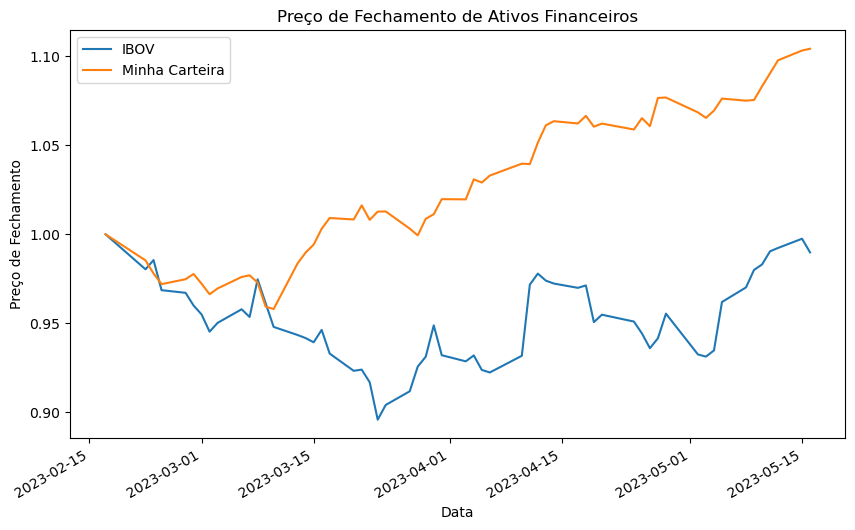

In [135]:
colunas = ['IBOV', 'Minha Carteira']

carteira_normalizada[colunas].plot(figsize = (10,6))

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')


plt.title('Preço de Fechamento de Ativos Financeiros')


plt.show()

In [137]:
#Performance bem acima do IBOV no período analisado

carteira_0 = carteira_normalizada[['IBOV', 'Minha Carteira']].iloc[0]
carteira_fim = carteira_normalizada[['IBOV', 'Minha Carteira']].iloc[-1]

# Calcula o crescimento percentual
crescimento_percentual = (carteira_fim / carteira_0 - 1) * 100

# Exibe o crescimento percentual
print(crescimento_percentual)

IBOV              -1.014611
Minha Carteira    10.414678
dtype: float64
